In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

In [ ]:
base_dir = '/content/drive/MyDrive/ml projects/SplitData'

train_dir = os.path.join(base_dir, 'train')
test_dir = os.path.join(base_dir, 'val')

In [16]:
# Define the dimensions of your images
img_width, img_height = 256, 256

# Define the batch size and number of epochs
batch_size = 32
epochs = 10

# Define the number of classes
num_classes = 5

# Create data generators for training and validation
train_datagen = ImageDataGenerator(
    rescale=1. / 255,
    target_size=(256, 256))

test_datagen = ImageDataGenerator(
    rescale=1. / 255,
    target_size=(256, 256))

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical')


TypeError: ImageDataGenerator.__init__() got an unexpected keyword argument 'target_size'

In [17]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(img_width, img_height, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(num_classes, activation='softmax')
])

In [18]:
# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [19]:
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size)

Epoch 1/10
28/28 [==============================] - 9s 253ms/step - loss: 1.4171 - accuracy: 0.7257 - val_loss: 0.0238 - val_accuracy: 0.9911
Epoch 2/10
28/28 [==============================] - 5s 188ms/step - loss: 0.0264 - accuracy: 0.9943 - val_loss: 9.7328e-04 - val_accuracy: 1.0000
Epoch 3/10
28/28 [==============================] - 6s 209ms/step - loss: 1.3805e-04 - accuracy: 1.0000 - val_loss: 0.0016 - val_accuracy: 1.0000
Epoch 4/10
28/28 [==============================] - 6s 196ms/step - loss: 2.8530e-05 - accuracy: 1.0000 - val_loss: 5.2658e-04 - val_accuracy: 1.0000
Epoch 5/10
28/28 [==============================] - 6s 217ms/step - loss: 1.3983e-05 - accuracy: 1.0000 - val_loss: 1.8186e-04 - val_accuracy: 1.0000
Epoch 6/10
28/28 [==============================] - 5s 190ms/step - loss: 9.5884e-06 - accuracy: 1.0000 - val_loss: 1.2592e-04 - val_accuracy: 1.0000
Epoch 7/10
28/28 [==============================] - 6s 205ms/step - loss: 3.5662e-06 - accuracy: 1.0000 - val_loss: 

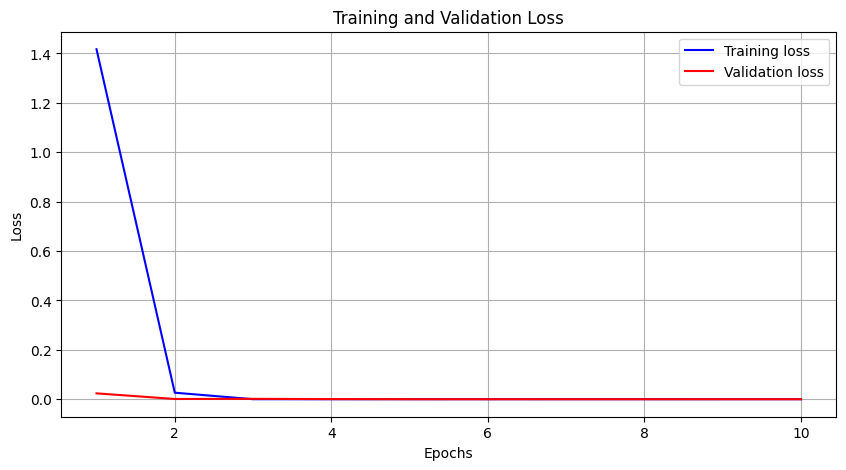

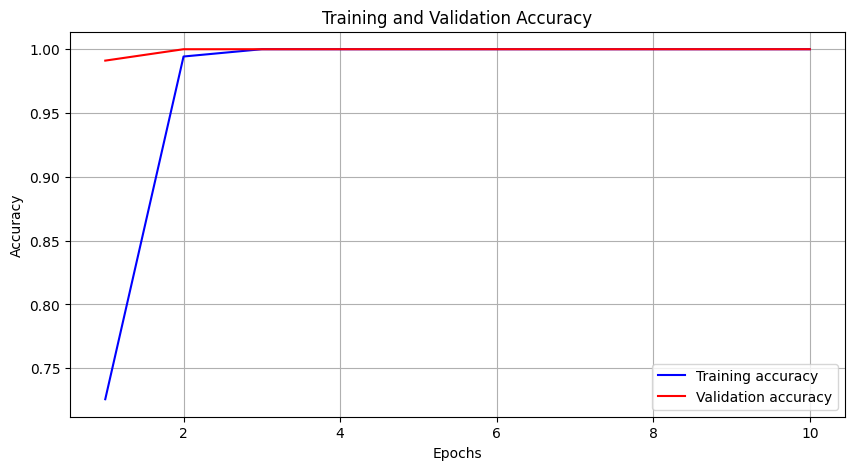

In [20]:
import matplotlib.pyplot as plt

# Extracting training and validation metrics from history
train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(1, len(train_loss) + 1)

# Plotting training and validation loss
plt.figure(figsize=(10, 5))
plt.plot(epochs, train_loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

# Plotting training and validation accuracy
plt.figure(figsize=(10, 5))
plt.plot(epochs, train_acc, 'b', label='Training accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

In [21]:
# Save the trained model
model.save('hand_gesture_recognition_model.h5')

In [22]:
# Define the desired path to save the model
save_path = '/content/drive/MyDrive/ml projects/hand_gesture_recognition_model.h5'

# Save the trained model to the specified path
model.save(save_path)

In [23]:
model.predict('/content/drive/MyDrive/ml projects/SplitData/train/rock/Image102.jpg')

IndexError: tuple index out of range